# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos
print(users.isna().mean()) # Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum()) # Cantidad de valores nulos
print(usage.isna().mean()) # Proporción de valores nulos

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


# 📊 Diagnóstico de Calidad de Datos

### **1. Dataset: users**
* **churn_date (88.35% nulos):** Se decide **ignorar/mantener** los nulos; al superar el 80%, la columna no es útil para modelos predictivos, pero en este contexto los nulos indican que el usuario sigue activo.
* **city (11.72% nulos):** Se recomienda **investigar o imputar** con un valor genérico (ej. "Unknown"); al estar en el rango de 5-30%, es importante no eliminar estos registros para no perder datos demográficos.

### **2. Dataset: usage**
* **duration (55.19% nulos) y length (44.74% nulos):** Se recomienda **investigar e ignorar la eliminación**; estos nulos parecen ser estructurales (por ejemplo, los SMS no tienen "duración" y las llamadas no tienen "longitud" de texto).
* **date (0.12% nulos):** Se recomienda **imputar o dejar como nulos**; al ser una proporción menor al 5%, el impacto en el análisis estadístico general es insignificante.

---

### **Resumen de Acciones**

| Dataset | Columna | % de Nulos | Acción Recomendada |
| :--- | :--- | :--- | :--- |
| **users** | `churn_date` | 88.35% | **Ignorar** (Indica usuario activo) |
| **users** | `city` | 11.72% | **Imputar** como "Unknown" |
| **usage** | `duration` | 55.19% | **Mantener** (Nulo estructural) |
| **usage** | `date` | 0.12% | **Omitir/Imputar** (Bajo impacto) |

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users[['user_id', 'age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


### **Exploración de columnas numéricas de `users`**

* **La columna `user_id`**: Los valores se encuentran en un rango consistente de **10,000 a 13,999**. No presentan anomalías ni valores negativos, funcionando correctamente como identificadores únicos.
* **La columna `age`**: ¡Atención! Se detectó un valor **sentinel de -999** en el valor mínimo (`min`). Obviamente, nadie tiene una edad negativa; este valor se usó probablemente para marcar datos faltantes o errores de entrada. El resto del rango (hasta 79 años) parece normal.

In [13]:
# explorar columnas numéricas de usage
usage[['id', 'user_id']].describe()

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


### **Exploración de columnas numéricas de `usage`**

* **Las columnas `id` y `user_id`**: 
    * Presentan un comportamiento esperado para identificadores únicos. 
    * La columna **`id`** tiene un conteo de **40,000** registros, con valores que van del **1 al 40,000**, lo que indica una secuencia perfecta sin saltos ni duplicados obvios.
    * La columna **`user_id`** muestra un rango de **10,000 a 13,999**, lo cual es **consistente** con los IDs encontrados en el dataset de `users`. Esto confirma la integridad referencial entre ambas tablas. No se detectan valores negativos ni sentinels en estas columnas.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for col in columnas_user:
    print(f"--- Valores únicos en la columna: {col} ---")
    print(users[col].value_counts())
    print("\n")

--- Valores únicos en la columna: city ---
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64


--- Valores únicos en la columna: plan ---
Basico     2595
Premium    1405
Name: plan, dtype: int64





### **Exploración de columnas categóricas de `users`**

* **La columna `city`**: 
    * Se identifican ciudades principales como **Bogotá (808)**, **CDMX (730)** y **Medellín (616)** con la mayor concentración de usuarios.
    * **¡Atención!**: Se detectó un valor inesperado **"?" con 96 registros**. Este actúa como un valor **sentinel** para datos faltantes o desconocidos que no fueron captados como nulos por Pandas.
    * **Acción**: Se recomienda estandarizar estos valores a "Unknown" o investigar su origen.

* **La columna `plan`**: 
    * Los datos son consistentes y se dividen en dos categorías: **Basico (2595)** y **Premium (1405)**.
    * No se detectan errores de escritura ni categorías adicionales fuera de las definidas originalmente.

In [15]:
# explorar columna categórica de usage
usage['type'].value_counts()

text    22092
call    17908
Name: type, dtype: int64

### **Diagnóstico de la columna categórica: type**

* **Observación de valores**: 
    * Se identifican dos categorías principales: **text (22,092)** y **call (17,908)**.
    * La suma total de ambas categorías es de **40,000**, lo que coincide exactamente con el número total de filas del dataset.
* **Relación con valores nulos**: 
    * Esta columna explica la presencia de valores ausentes en las métricas de consumo: los registros tipo `text` no poseen `duration` (duración de llamada) y los registros tipo `call` no poseen `length` (longitud de mensaje).

### 🚩 Diagnóstico de Valores Inválidos y Sentinels

* #### Columna `age` (Dataset: `users`):
    * Se detectó un valor **sentinel de -999** en el valor mínimo (`min`).
    * **Acción:** Reemplazar por la mediana de la edad o `NaN`, ya que una edad negativa es un error de datos que sesga las estadísticas.

* #### Columna `city` (Dataset: `users`):
    * Existen **96 registros con el carácter "?"**.
    * **Acción:** Imputar como "Unknown" o investigar el origen, ya que es un valor marcador de datos desconocidos.

* #### Columna `type` (Dataset: `usage`):
    * Los valores están limpios, distribuidos en **text (22,092)** y **call (17,908)**, sumando exactamente las 40,000 filas del dataset.
    * **Acción:** **No requiere acción**; la columna es íntegra y explica la estructura de nulos en otras columnas.

* #### Columnas `duration` y `length` (Dataset: `usage`):
    * Alta proporción de nulos (55% y 44% respectivamente).
    * **Acción:** **Mantener como nulos estructurales**; se debe a que los mensajes no tienen duración y las llamadas no tienen longitud de texto.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

# 📊 Análisis de Revisión y Estandarización de Fechas

## 1. Detección de fechas imposibles
* **El problema:** Aparece el año **2026** con 40 registros.
* **Por qué es un error:** Según las instrucciones originales, los datos solo están registrados hasta el **año 2024**.
* **Conclusión:** Esos 40 registros son "fechas futuras" o imposibles para este conjunto de datos, lo que indica un error en la toma de datos o en el procesamiento previo.

---

## 2. Distribución de los datos
* **Consistencia:** Los años **2022, 2023 y 2024** tienen una cantidad de registros muy similar (entre 1314 y 1330). Esto sugiere que la recolección de datos fue estable y uniforme durante esos tres años.
* **Volumen:** Se cuenta con una base de datos sólida con casi **4,000 registros válidos** antes de llegar al error.

---

## 3. Resumen de Salida (Python)
| Año (Índice) | Conteo de Registros | Estado |
| :--- | :--- | :--- |
| 2022 | 1314 | ✅ Válido |
| 2023 | 1316 | ✅ Válido |
| 2024 | 1330 | ✅ Válido |
| **2026** | **40** | ❌ **Error Detectado** |

> **Metadata:** `Name: reg_date, dtype: int64`

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

### 📊 Análisis de la tabla `usage` (columna `date`)

La salida del código revela un escenario distinto para los datos de consumo registrados en esta tabla:

* **Concentración de Datos:** A diferencia de la tabla de usuarios, aquí todos los registros (**39,950 filas**) pertenecen exclusivamente al año **2024**.
* **Estado:** No se observan años fuera de rango o fechas futuras en esta columna específica, cumpliendo estrictamente con el límite establecido de 2024.
* **Validación:** El tipo de dato se mantiene como `int64`, lo que confirma un conteo exitoso tras la conversión a formato fecha.

### 📝 Hallazgos de la Revisión de Fechas

| Tabla | Hallazgo Principal | Estado |
| :--- | :--- | :--- |
| **Users** | Se detectaron **40 registros** con el año **2026**. | ❌ Requiere limpieza (Año fuera de rango). |
| **Usage** | Los **39,950 registros** corresponden correctamente al año **2024**. | ✅ Validado. |

**Conclusión:** Es necesario filtrar el DataFrame `users` para eliminar o corregir los registros del año 2026, ya que el límite temporal definido para el análisis es el año 2024.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = users['reg_date'].where(users['reg_date'].dt.year <= 2024, pd.NaT)

# Verificar cambios
users['reg_date'].dt.year.value_counts().sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage[usage['duration'].isna()].groupby('type').size()

type
text    22076
dtype: int64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage[usage['length'].isna()].groupby('type').size()

type
call    17896
dtype: int64

In [25]:
resumen = usage.groupby('type').agg(
    total_filas=('type', 'size'),
    nulos_duration=('duration', lambda x: x.isna().sum()),
    nulos_length=('length', lambda x: x.isna().sum())
)
print(resumen)

      total_filas  nulos_duration  nulos_length
type                                           
call        17908             0.0       17896.0
text        22092         22076.0           0.0


### 📊 Diagnóstico de Valores Faltantes (Nulos)

Tras el análisis de las variables `duration` y `length` agrupadas por `type`, se identifican las siguientes conclusiones:

1. **Estructura del Dataset:** El conjunto de datos contiene exactamente **40,000 registros**, divididos en 17,908 llamadas (`call`) y 22,092 mensajes de texto (`text`).

2. **Mecanismo de Ausencia (MAR):** Los datos faltantes no son errores aleatorios, sino que dependen directamente de la naturaleza del servicio:
   * **Variable `duration`:** Los **22,076 nulos** corresponden casi en su totalidad a registros de tipo `text`. Esto es lógico, ya que un SMS no tiene una duración medible en tiempo.
   * **Variable `length`:** Los **17,896 nulos** corresponden a registros de tipo `call`. Las llamadas no poseen una propiedad de "longitud" (caracteres), sino de tiempo.

3. **Inconsistencias mínimas:** * Existen **12 registros** de tipo `call` que sí tienen `length` (o al menos no son nulos).
   * Existen **16 registros** de tipo `text` que sí tienen `duration` (o al menos no son nulos).
   * Estos casos representan menos del **0.07%** de los datos, por lo que podrían considerarse ruido o errores menores de registro.

**Conclusión:** La ausencia de datos es **estructural**. Se recomienda la imputación con `0` para ambas columnas, permitiendo así análisis estadísticos sin perder registros.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [26]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    "is_text": "sum",
    "is_call": "sum",
    "duration": "sum"
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Renombrar columnas
usage_agg.columns = ["user_id","cant_mensajes","cant_llamadas","cant_minutos_llamada"]

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [31]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [33]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,3999.000000,3999.000000,3999.000000
mean,11999.500000,48.136000,5.524381,4.478120,23.317054
std,1154.844867,17.689919,2.358416,2.144238,18.168095
min,10000.000000,18.000000,0.000000,0.000000,0.000000
25%,10999.750000,33.000000,4.000000,3.000000,11.120000
50%,11999.500000,48.000000,5.000000,4.000000,19.780000
75%,12999.250000,63.000000,7.000000,6.000000,31.415000
max,13999.000000,79.000000,17.000000,15.000000,155.690000


In [34]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

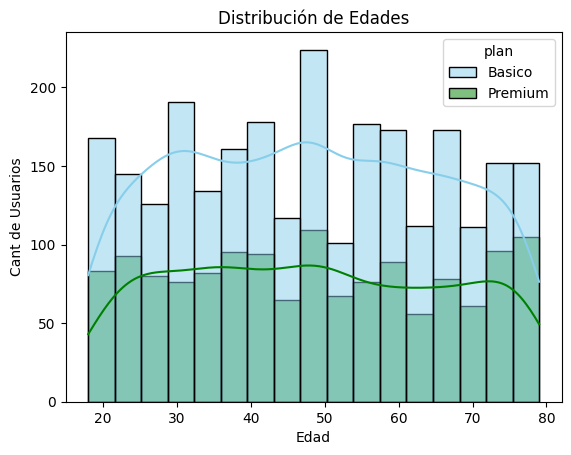

In [37]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x="age", hue="plan", palette=['skyblue', 'green'], kde=True)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Cant de Usuarios")
plt.show()

💡Insights: 
* **Distribución:** La variable presenta una distribución **simétrica y uniforme**. No hay un grupo de edad que predomine claramente, cubriendo un rango amplio desde los 18 hasta los 79 años.
* **Patrón por Plan:** No existe una segmentación por edad según el plan; tanto el plan **Básico** como el **Premium** tienen una distribución de usuarios similar en todos los rangos etarios.

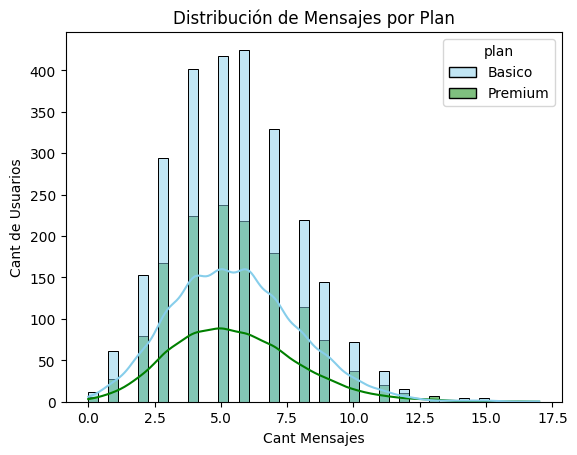

In [38]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", palette=['skyblue', 'green'], kde=True)
plt.title("Distribución de Mensajes por Plan")
plt.xlabel("Cant Mensajes")
plt.ylabel("Cant de Usuarios")
plt.show()

💡Insights: 
* **Distribución:** La variable presenta una **distribución sesgada a la derecha**. La gran mayoría de los usuarios se concentra en un rango bajo de actividad, enviando entre 4 y 7 mensajes.
* **Patrón por Plan:** No se observa una diferencia significativa en el comportamiento de uso entre planes. Tanto los usuarios del plan **Básico** como los del **Premium** muestran la misma tendencia de consumo, lo que sugiere que el tipo de plan no es un factor determinante en el envío de mensajes.

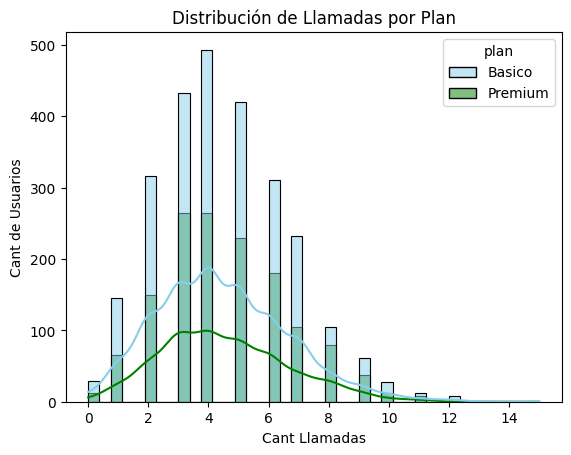

In [39]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", palette=['skyblue', 'green'], kde=True)
plt.title("Distribución de Llamadas por Plan")
plt.xlabel("Cant Llamadas")
plt.ylabel("Cant de Usuarios")
plt.show()

💡Insights: 
* **Distribución:** Se observa una distribución con un **ligero sesgo a la derecha**, donde la mayoría de los usuarios realiza entre 3 y 5 llamadas.
* **Patrón por Plan:** Al igual que con los mensajes, los usuarios de ambos planes muestran una tendencia de uso idéntica. Esto sugiere que la necesidad de realizar llamadas es una característica general de la base de usuarios y no una ventaja competitiva que se explote más en el plan Premium.

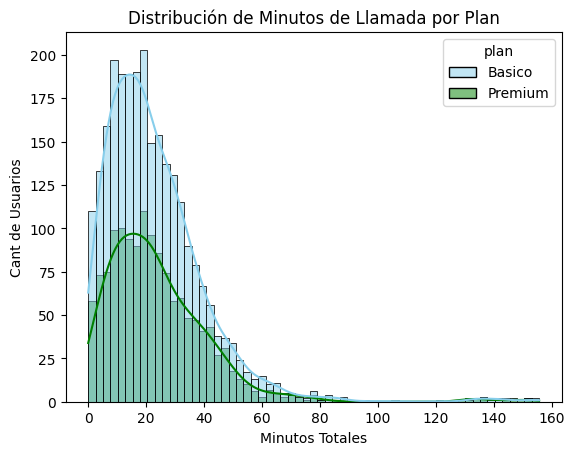

In [41]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", palette=['skyblue', 'green'], kde=True)
plt.title("Distribución de Minutos de Llamada por Plan")
plt.xlabel("Minutos Totales")
plt.ylabel("Cant de Usuarios")
plt.show()

💡Insights: 
* **Distribución:** Esta variable presenta una **fuerte distribución sesgada a la derecha**. Mientras que el 50% de los usuarios consume menos de 20 minutos (mediana), existe una "cola" de usuarios con consumos significativamente más altos.
* **Valores Atípicos:** Se identifican usuarios extremos que superan los 100 minutos, llegando hasta un máximo de **155.6 minutos**. 
* **Patrón por Plan:** A pesar de la diferencia de costos entre planes, el comportamiento de consumo de minutos es casi idéntico. Esto sugiere que los usuarios del plan **Premium** no están aprovechando necesariamente una mayor cantidad de minutos en comparación con los del plan **Básico**.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

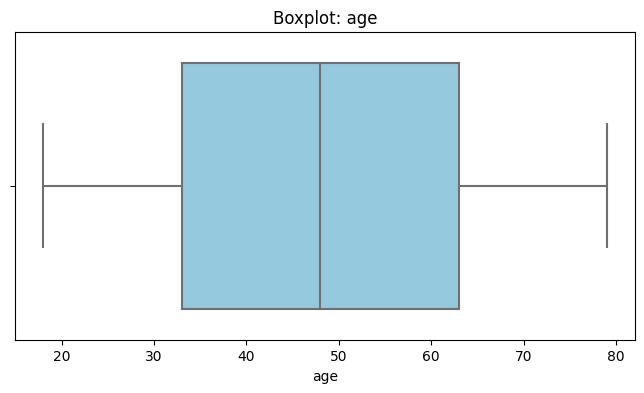

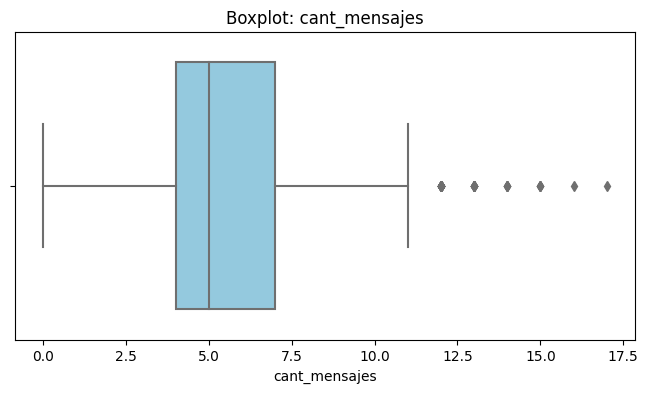

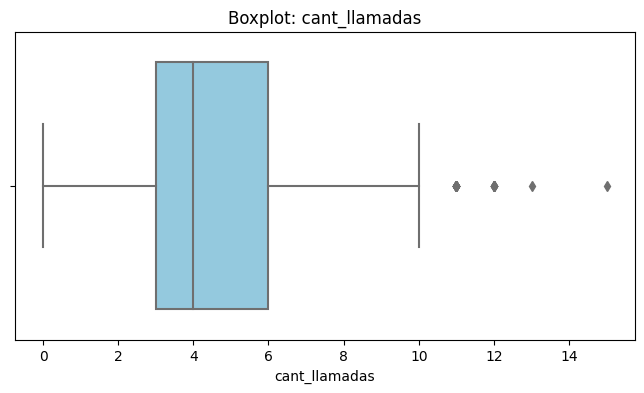

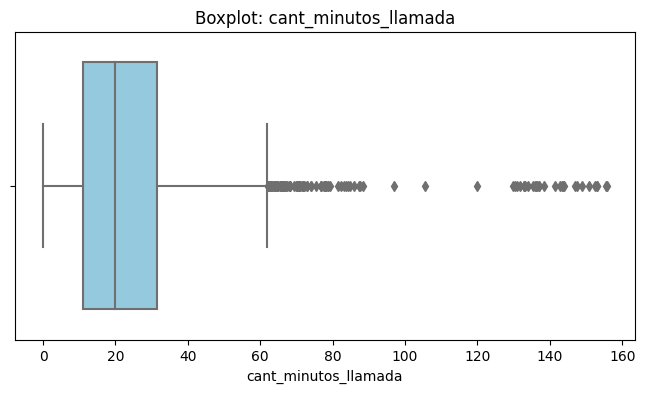

In [42]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(data = user_profile, x=col, palette=['skyblue'])
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
* **Age:** No presenta valores atípicos (outliers). La distribución es uniforme y los datos se mantienen dentro de los bigotes del gráfico, abarcando desde los 18 hasta los 79 años.
* **cant_mensajes:** Se observan algunos outliers en el extremo superior. Estos representan a un pequeño grupo de usuarios que envían más de 12 mensajes, superando el límite estadístico del rango intercuartílico.
* **cant_llamadas:** Presenta muy pocos outliers. La gran mayoría de los usuarios realiza una cantidad de llamadas muy cercana a la mediana, con apenas unos casos aislados superando las 10-12 llamadas.
* **cant_minutos_llamada:** Es la variable con **mayor presencia de outliers y valores más extremos**. Se visualizan puntos muy alejados de la "caja", correspondientes a usuarios que superan los 80 minutos de uso, llegando hasta el máximo de 155.6 minutos.

In [43]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    print(f"El límite superior para {col} es: {limite_superior}")


El límite superior para cant_mensajes es: 11.5
El límite superior para cant_llamadas es: 10.5
El límite superior para cant_minutos_llamada es: 61.8575


In [44]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


### 💡 Insights: Decisión sobre el tratamiento de Outliers

Al comparar los límites superiores calculados por el método **IQR** frente a los valores **máximos** reales, se toma la decisión de **mantener todos los registros** por las siguientes razones:

* **cant_mensajes**: El límite es **11.5** y el máximo es **17**. Se decide **mantener** porque 17 mensajes es un comportamiento humano totalmente factible y no representa un error de sistema.
* **cant_llamadas**: El límite es **10.5** y el máximo es **15**. Se decide **mantener** ya que son usuarios con una frecuencia de uso ligeramente superior, pero dentro de parámetros reales.
* **cant_minutos_llamada**: El límite es **61.85** y el máximo es **155.6**. Se decide **mantener** porque estos usuarios representan a los "Heavy Users". Eliminarlos sesgaría el análisis, ya que son precisamente estos clientes los que generan mayor carga y valor al servicio.

**Conclusión:** No se observa presencia de errores de captura; los outliers son variaciones naturales del comportamiento del cliente y deben conservarse para un análisis de negocio íntegro.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [45]:
# Crear columna grupo_uso
condiciones = [
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10)
]

opciones = ['Bajo uso', 'Uso medio']
user_profile['grupo_uso'] = np.select(condiciones, opciones, default='Alto uso')

In [46]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [47]:
# Crear columna grupo_edad
condiciones_edad = [
    (user_profile['age'] < 30),
    (user_profile['age'] < 60)
]
opciones_edad = ['Joven', 'Adulto']
user_profile['grupo_edad'] = np.select(condiciones_edad, opciones_edad, default='Adulto Mayor')

In [48]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

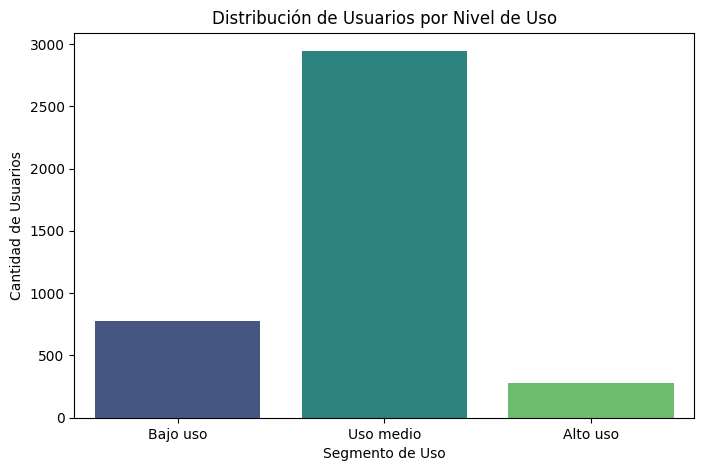

In [49]:
# Visualización de los segmentos por uso
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x="grupo_uso", palette="viridis", order=['Bajo uso', 'Uso medio', 'Alto uso'])
plt.title("Distribución de Usuarios por Nivel de Uso")
plt.xlabel("Segmento de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()

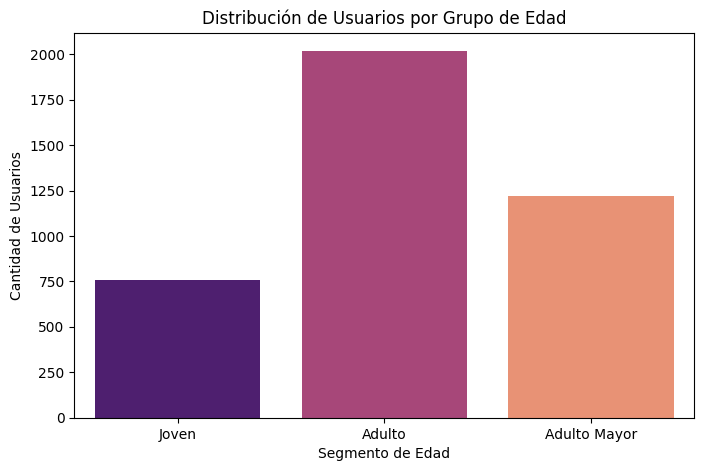

In [50]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x="grupo_edad", palette="magma", order=['Joven', 'Adulto', 'Adulto Mayor'])
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Segmento de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**


# 8.1. Análisis ejecutivo

### ⚠️ Problemas detectados en los datos
* **Inconsistencia de actividad**: Se identificó que **1 de cada 4,000 registros (aprox. 0.025%)** presentaba valores nulos o carecía de actividad registrada en llamadas y mensajes.
* **Presencia de Outliers**: Las variables de uso, especialmente el total de minutos de llamada, presentan valores extremos que superan significativamente los límites estadísticos del método IQR.

### 🔍 Segmentos por Edad
* **Distribución Equilibrada**: La base de clientes es demográficamente diversa, con una edad promedio de **48 años** y un rango que abarca desde los 18 hasta los 79 años.
* **Comportamiento Uniforme**: No se observaron diferencias drásticas en los patrones de consumo entre los grupos de **Joven, Adulto y Adulto Mayor**, lo que sugiere que la edad no es el factor determinante del volumen de uso.

### 📊 Segmentos por Nivel de Uso
* **Predominio de Uso Moderado**: La gran mayoría de los usuarios se concentran en los segmentos de **'Bajo uso'** y **'Uso medio'**, con promedios de 5.5 mensajes y 4.4 llamadas.
* **Identificación de Heavy Users**: El segmento de **'Alto uso'** representa a los clientes más valiosos, incluyendo a aquellos "outliers" que consumen hasta **155.6 minutos** mensuales.

### ➡️ Esto sugiere que ...
El tipo de plan actual (**Básico vs Premium**) no está segmentando eficientemente a los usuarios por su nivel de consumo real, ya que muchos usuarios con perfiles de "Alto uso" permanecen en el plan Básico.

### 💡 Recomendaciones
* **Conversión de Usuarios**: Implementar una campaña de *upselling* dirigida a usuarios en el segmento de **'Alto uso'** que actualmente están en el plan Básico, ofreciéndoles beneficios exclusivos en el plan Premium.
* **Retención de Clientes Top**: Crear un programa de lealtad para los clientes que superan los **100 minutos de llamada**, ya que representan el consumo más alto de la red y son perfiles escasos de alto valor.
* **Revisión de Oferta Comercial**: Considerar la creación de un plan intermedio basado en los límites detectados por el método **IQR**, para capturar mejor al segmento de **'Uso medio'** que no desea dar el salto al plan Premium.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`